<a href="https://colab.research.google.com/github/venkatAmigo/Sample/blob/master/BackMatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![background matting](https://i.imgur.com/AtVo6zF.png)

The notebook is split into three parts: required setup, running the algorithm on photos, and running it on videos. You may want to use playground mode to make minor changes, should you need to.

# Required setup

Instructions: Go to Runtime -> Change runtime type and select "GPU" before proceeding. Then, begin by cloning the repo:

In [1]:
!git clone https://github.com/senguptaumd/Background-Matting.git
%cd Background-Matting/

Cloning into 'Background-Matting'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269
Receiving objects: 100% (269/269), 59.20 MiB | 31.72 MiB/s, done.
Resolving deltas: 100% (150/150), done.
/content/Background-Matting


Set up the environment:

In [2]:
!pip3 install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip3 install tensorflow-gpu==1.14.0
!pip install -r requirements.txt

!git clone https://github.com/tensorflow/models.git
%cd models/research/
import os
os.environ["PYTHONPATH"] += f":{os.getcwd()}:{os.getcwd()}/slim"
%cd ../..

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 14.4MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 377.0MB 47kB/s 
     |████████████████████████████████| 491kB 57.9MB/s 
     |████████████████████████████████| 3.2MB 56.5MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2

Cloning into 'models'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 36416 (delta 27), reused 29 (delta 6), pack-reused 36360
Receiving objects: 100% (36416/36416), 520.30 MiB | 38.03 MiB/s, done.
Resolving deltas: 100% (24299/24299), done.
/content/Background-Matting/models/research
/content/Background-Matting


Download model weights for real-fixed-cam and real-hand-held


In [3]:
!wget https://gist.githubusercontent.com/andreyryabtsev/458f7450c630952d1e75e195f94845a0/raw/0b4336ac2a2140ac2313f9966316467e8cd3002a/download.sh
!chmod +x download.sh
!./download.sh

--2020-05-30 17:31:30--  https://gist.githubusercontent.com/andreyryabtsev/458f7450c630952d1e75e195f94845a0/raw/0b4336ac2a2140ac2313f9966316467e8cd3002a/download.sh
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684 [text/plain]
Saving to: ‘download.sh’

download.sh         100%[===================>]     684  --.-KB/s    in 0s      

2020-05-30 17:31:30 (36.2 MB/s) - ‘download.sh’ saved [684/684]

--2020-05-30 17:31:40--  https://docs.google.com/uc?export=download&confirm=&id=1yiNsSkPYoBZ55fSQ1iwb1io9QL_PcR2i
Resolving docs.google.com (docs.google.com)... 108.177.119.102, 108.177.119.139, 108.177.119.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Locati

# Running on images

In [0]:
cp -r sample_data colab_inputs

## Upload images

Upload your *foreground images* (similar to https://github.com/senguptaumd/Background-Matting/tree/master/sample_data/input) after running the cell below - they will be saved to `colab_inputs` for processing in further cells. Each image you want matted should be uploaded as `NAME_img.png` and `NAME_back.png` for the respective background. Rerun the cell multiple times if you missed some the first time around.

In [0]:
!mkdir -p colab_inputs/input
%cd colab_inputs/input
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with {length} bytes'.format(name=filename, length=len(uploaded[filename])))
%cd ../..

/content/Background-Matting/colab_inputs/input


Saving 1500_img.png to 1500_img.png
Saving 1500_back.png to 1500_back.png
Saving 1000_img.png to 1000_img.png
Saving 1000_back.png to 1000_back.png
Saving 0500_img.png to 0500_img.png
Saving 0500_back.png to 0500_back.png
Saving 0001_img.png to 0001_img.png
Saving 0001_back.png to 0001_back.png
User uploaded file "1500_img.png" with 3044106 bytes
User uploaded file "1500_back.png" with 2170053 bytes
User uploaded file "1000_img.png" with 3474001 bytes
User uploaded file "1000_back.png" with 2170053 bytes
User uploaded file "0500_img.png" with 3341550 bytes
User uploaded file "0500_back.png" with 2170053 bytes
User uploaded file "0001_img.png" with 3047998 bytes
User uploaded file "0001_back.png" with 2170053 bytes
/content/Background-Matting


Upload your *target background images* (similar to https://github.com/senguptaumd/Background-Matting/tree/master/sample_data/background) after running the cell below. You can choose the target background to use by name later.


In [0]:
!mkdir -p colab_inputs/background
%cd colab_inputs/background
uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with {length} bytes'.format(name=filename, length=len(uploaded[filename])))
%cd ../..

/content/Background-Matting/colab_inputs/background


Saving 0002.png to 0002.png
Saving 0001.png to 0001.png
User uploaded file "0002.png" with 2409622 bytes
User uploaded file "0001.png" with 2094024 bytes
/content/Background-Matting


##Process images

Run segmentation


In [32]:
!python3 test_segmentation_deeplab.py -i colab_inputs/sample_data/input


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Pre-process (transform-align) with AKAZE features. Skip the following cell if your data was captured with a tripod.

In [33]:
!python test_pre_process.py -i colab_inputs/sample_data/input


Done: colab_inputs/sample_data/input


Run matting - replace "0001.png" with the uploaded background you wish to use. Replace "real-hand-held" with "real-fixed-cam" for tripod images for best results.

In [37]:
!CUDA_VISIBLE_DEVICES=0 python test_background-matting_image.py -m real-hand-held -i colab_inputs/sample_data/input/ -o colab_inputs/output/ -tb colab_inputs/sample_data/background/diss.jpg

CUDA Device: 0
Using image mode
colab_inputs/sample_data/background/diss.jpg
Done: 1/4
Done: 2/4
Done: 3/4
Done: 4/4


Visualize results!

['colab_inputs/output/1500_compose.png', 'colab_inputs/output/1000_compose.png', 'colab_inputs/output/0001_compose.png', 'colab_inputs/output/0500_compose.png']
Showing colab_inputs/output/1500_compose.png


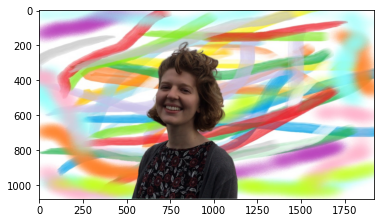

In [38]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
from glob import glob
%matplotlib inline
results = glob("colab_inputs/output/*_compose.png")
print(results)
if len(results) > 0:
  print(f"Showing {results[0]}")
  testim = mpimg.imread(results[0])
  imshow(testim)


#Running on video

Warning: going through the process on videos, especially in excess of 10 seconds, can take quite some time on Colab

In [0]:
#Uncomment and run this if you want to skip uploading your videos (below) and run on the sample videos instead (choose fixed or handheld)

# !wget https://gist.githubusercontent.com/andreyryabtsev/79d1166452ebd5d5775fbf9169431967/raw/4d20c260d3b3379d1ea9e2e4baab013caf25bc4d/download_vids.sh
# !chmod +x download_vids.sh
# !./download_vids.sh handheld
# # !./download_vids.sh fixed

## Upload videos


Upload the video from which you would like to extract the foreground, a still of the background, as well as a target background video. Name them `video.mp4`, `video_back.png`, and `target_background.mp4` respectively -- or change the first cell under "process videos" to use your names. You can use any other method to upload if this one takes long (e.g. mount Drive and copy files over).

In [0]:
!mkdir -p colab_inputs_video
%cd colab_inputs_video
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with {length} bytes'.format(name=filename, length=len(uploaded[filename])))
%cd ..

/content/Background-Matting/colab_inputs_video/colab_inputs_video


Saving target_background.mp4 to target_background.mp4
User uploaded file "target_background.mp4" with 82187849 bytes
/content/Background-Matting/colab_inputs_video


## Process videos

Select the files to use:

In [0]:
os.environ["BM_SOURCE_VIDEO"] = "video.mp4"
os.environ["BM_SOURCE_STILL"] = "video_back.png"
os.environ["BM_TARGET_VIDEO"] = "target_background.mp4"
os.environ["FRAME_RATE"] = "60" # used only in combining output frames

os.environ["BM_OUTPUT_COMPOSE"] = "video_result.mp4"
os.environ["BM_OUTPUT_MATTE"] = "video_result_matte.mp4"

Extract frames

In [0]:
%cd colab_inputs_video
%mkdir input background
!ffmpeg -i $BM_SOURCE_VIDEO input/%04d_img.png -hide_banner
!ffmpeg -i $BM_TARGET_VIDEO background/%04d.png -hide_banner
%cd ..

[Errno 2] No such file or directory: 'colab_inputs_video'
/content/Background-Matting/colab_inputs_video
mkdir: cannot create directory ‘input’: File exists
mkdir: cannot create directory ‘background’: File exists
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'video.mp4':
  Metadata:
    major_brand     : qt  
    minor_version   : 0
    compatible_brands: qt  
    creation_time   : 2019-11-13T23:28:33.000000Z
    com.apple.quicktime.location.ISO6709: +47.6532-122.3053+045.382/
    com.apple.quicktime.make: Apple
    com.apple.quicktime.model: iPhone 6s
    com.apple.quicktime.software: 11.4.1
    com.apple.quicktime.creationdate: 2019-11-13T14:55:52-0800
  Duration: 00:00:26.83, start: 0.000000, bitrate: 23706 kb/s
    Stream #0:0(und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(tv, bt709), 1920x1080, 23586 kb/s, 59.96 fps, 59.94 tbr, 600 tbn, 1200 tbc (default)
    Metadata:
      creation_time   : 2019-11-13T23:28:33.000000Z
      handler_name    : Core Media Data Handler
      encod

Run segmentation

In [0]:
!python test_segmentation_deeplab.py -i colab_inputs_video/input

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Align the frames -- skip this step if your video was captured with a fixed camera

In [0]:
!python test_pre_process_video.py -i colab_inputs_video/input -v_name colab_inputs_video/$BM_SOURCE_STILL

Done: 1/1609
Done: 2/1609
Done: 3/1609
Done: 4/1609
Done: 5/1609
Done: 6/1609
Done: 7/1609
Done: 8/1609
Done: 9/1609
Done: 10/1609
Done: 11/1609
Done: 12/1609
Done: 13/1609
Done: 14/1609
Done: 15/1609
Done: 16/1609
Done: 17/1609
Done: 18/1609
Done: 19/1609
Done: 20/1609
Done: 21/1609
Done: 22/1609
Done: 23/1609
Done: 24/1609
Done: 25/1609
Done: 26/1609
Done: 27/1609
Done: 28/1609
Done: 29/1609
Done: 30/1609
Done: 31/1609
Done: 32/1609
Done: 33/1609
Done: 34/1609
Done: 35/1609
Done: 36/1609
Done: 37/1609
Done: 38/1609
Done: 39/1609
Done: 40/1609
Done: 41/1609
Done: 42/1609
Done: 43/1609
Done: 44/1609
Done: 45/1609
Done: 46/1609
Done: 47/1609
Done: 48/1609
Done: 49/1609
Done: 50/1609
Done: 51/1609
Done: 52/1609
Done: 53/1609
Done: 54/1609
Done: 55/1609
Done: 56/1609
Done: 57/1609
Done: 58/1609
Done: 59/1609
Done: 60/1609
Done: 61/1609
Done: 62/1609
Done: 63/1609
Done: 64/1609
Done: 65/1609
Done: 66/1609
Done: 67/1609
Done: 68/1609
Done: 69/1609
Done: 70/1609
Done: 71/1609
Done: 72/1609
D

Run the matting algorithm. If your video was captured with a fixed camera, comment the first line and uncomment the second before running.

In [0]:
!CUDA_VISIBLE_DEVICES=0 python test_background-matting_image.py -m real-hand-held -i colab_inputs_video/input/ -o colab_inputs_video/output/ -tb colab_inputs_video/background/
# !CUDA_VISIBLE_DEVICES=0 python test_background-matting_image.py -m real-fixed-cam -i colab_inputs_video/input/ -o colab_inputs_video/output/ -tb colab_inputs_video/background/ -b colab_inputs_video/$BM_SOURCE_STILL

CUDA Device: 0
Using video mode
Done: 1/1609
Done: 2/1609
Done: 3/1609
Done: 4/1609
Done: 5/1609
Done: 6/1609
Done: 7/1609
Done: 8/1609
Done: 9/1609
Done: 10/1609
Done: 11/1609
Done: 12/1609
Done: 13/1609
Done: 14/1609
Done: 15/1609
Done: 16/1609
Done: 17/1609
Done: 18/1609
Done: 19/1609
Done: 20/1609
Done: 21/1609
Done: 22/1609
Done: 23/1609
Done: 24/1609
Done: 25/1609
Done: 26/1609
Done: 27/1609
Done: 28/1609
Done: 29/1609
Done: 30/1609
Done: 31/1609
Done: 32/1609
Done: 33/1609
Done: 34/1609
Done: 35/1609
Done: 36/1609
Done: 37/1609
Done: 38/1609
Done: 39/1609
Done: 40/1609
Done: 41/1609
Done: 42/1609
Done: 43/1609
Done: 44/1609
Done: 45/1609
Done: 46/1609
Done: 47/1609
Done: 48/1609
Done: 49/1609
Done: 50/1609
Done: 51/1609
Done: 52/1609
Done: 53/1609
Done: 54/1609
Done: 55/1609
Done: 56/1609
Done: 57/1609
Done: 58/1609
Done: 59/1609
Done: 60/1609
Done: 61/1609
Done: 62/1609
Done: 63/1609
Done: 64/1609
Done: 65/1609
Done: 66/1609
Done: 67/1609
Done: 68/1609
Done: 69/1609
Done: 70/16

Combine frames into video

In [0]:
%cd colab_inputs_video
!ffmpeg -r $FRAME_RATE -f image2 -i output/%04d_matte.png -vcodec libx264 -crf 15 -s 1280x720 -pix_fmt yuv420p $BM_OUTPUT_MATTE
!ffmpeg -r $FRAME_RATE -f image2 -i output/%04d_compose.png -vcodec libx264 -crf 15 -s 1280x720 -pix_fmt yuv420p $BM_OUTPUT_COMPOSE
%cd ..

/content/Background-Matting/colab_inputs_video
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-

The resulting videos can be downloaded from the files tab on the left!